## Convolution Layer 이해하기

Conv2D (2차원 합성곱)는 많은 딥러닝 프레임워크, 특히 TensorFlow와 Keras에서 사용되는 핵심 레이어로, 2차원 합성곱 신경망 (CNN)을 구현하는 데 사용됩니다. CNN은 이미지 데이터를 다루는 작업에 특히 효과적이지만 그리드 형식의 데이터 구조를 다루는 다양한 작업에도 적용할 수 있습니다. 다음은 Conv2D에 대한 설명과 동작 방식에 대한 내용입니다:

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import numpy as np

## 데이터 생성

해당 코드는 NumPy를 사용하여 생성한 4x4 크기의 이미지를 나타내는 다차원 배열입니다. 코드와 배열의 주요 내용을 한글로 설명하겠습니다:

In [34]:
# 4x4 크기의 이미지를 나타내는 NumPy 배열을 생성합니다.
image = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]], dtype=np.float32)

# dtype=np.float32를 사용하여 배열의 데이터 타입을 '부동소수점 32비트'로 설정합니다.
# 이는 이미지의 각 픽셀 값이 소수점을 가질 수 있도록 합니다.
image

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]], dtype=float32)

## 이미지 데이터 시각화해보기

이 코드는 Matplotlib를 사용하여 이미지 데이터를 시각화하는 코드입니다. plt.imshow() 함수를 사용하여 이미지를 화면에 표시합니다

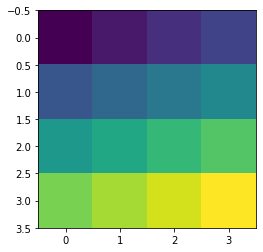

In [29]:
import matplotlib.pyplot as plt
plt.imshow(image)

## 케라스 레이어로 처리를 위한 이미지 데이터 차원 재구성

reshape() 함수를 사용하여 배열의 형태를 변경했으며, 여기서는 이미지를 배치(batch)로 처리할 수 있도록 4차원 배열로 재구성합니다. 각 차원은 다음과 같이 해석할 수 있습니다.

* 첫 번째 차원 (1): 이미지 배치의 크기를 나타냅니다. 이 경우에는 하나의 이미지를 처리하므로 배치 크기가 1입니다.
* 두 번째 차원 (4): 이미지의 높이를 나타냅니다. 이 경우에는 4픽셀 높이가 있습니다.
* 세 번째 차원 (4): 이미지의 너비를 나타냅니다. 이 경우에는 4픽셀 너비가 있습니다.
* 네 번째 차원 (1): 이미지의 채널 수를 나타냅니다. 이 경우에는 흑백 이미지이므로 채널 수가 1입니다.

In [30]:
image = image.reshape((1,4,4,1))

## Conv2D 레이어 정의

이 코드는 Keras에서 Conv2D 레이어를 정의하는 예제입니다. Conv2D 레이어는 합성곱 신경망(Convolutional Neural Network, CNN) 모델의 핵심 구성 요소 중 하나로, 이미지나 그리드 데이터에서 특징을 추출하는 데 사용됩니다. 코드의 각 인수 및 설정에 대한 설명은 다음과 같습니다:

* filters=1: 이 레이어에서 사용할 필터(또는 커널)의 수를 나타냅니다. 1개의 필터를 사용하므로 이 레이어는 하나의 특징 맵(feature map)을 생성합니다.

* kernel_size=(3, 3): 필터의 크기를 정의합니다. 이 경우, 3x3 크기의 필터가 사용됩니다. 이 필터는 입력 데이터를 슬라이딩하여 합성곱 연산을 수행할 때 사용됩니다.

* activation='relu': 활성화 함수를 지정합니다. 이 레이어에서는 ReLU (Rectified Linear Unit) 활성화 함수가 사용됩니다. ReLU는 주로 합성곱 레이어 다음에 적용되어 비선형성을 도입합니다.

* input_shape=(4, 4, 1): 입력 데이터의 모양(shape)를 정의합니다. 이 레이어에는 4x4 크기의 입력 이미지가 있으며, 각 이미지는 단일 채널로 구성됩니다. 1은 흑백 이미지를 나타내며, 컬러 이미지의 경우 채널 수가 3(RGB)이 될 것입니다.



In [31]:
conv_layer = Conv2D(filters=1,
                    kernel_size=(3,3),
                    activation='relu',
                    input_shape=(4,4,1))

## Conv2D 레이어 연산결과

출력 결과를 해석하면, 입력 이미지를 Conv2D 레이어에 통과시켜 얻은 출력 데이터로, 각 위치에서 계산된 값이 표시됩니다. 이 출력은 입력 이미지를 필터(커널)와 합성곱하여 얻은 특징 맵(feature map)이며, 특징을 추출한 결과입니다.

In [32]:
conv_layer(image)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[1.4884605],
         [2.930644 ]],

        [[7.257194 ],
         [8.699378 ]]]], dtype=float32)>

## 연습문제

1. filter를 2개로 변경하였을때 어떤 결과가 나오는지 살펴보자
2. kernel_size를 (2,2)로 줄이면 어떤 결과가 나오는가?
3. input_shape = (4,4,3)으로 바꾸고 레이어에 통과될 수 있도록 데이터를 변경하여 계산하여 보시오